In [15]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob, os, random

In [16]:
rec_df = pd.read_csv('../preprocess_data/species_and_record_url.csv')
species_df = pd.read_csv('../preprocess_data/species_keys.csv')
species = np.unique(species_df['species_id'].values).tolist()

# each spectrogram in train_bird_spectrogram represents a genre
possib_species = glob.glob('../train_bird_spectrograms/*')
possib_species = [os.path.basename(x).replace('.npy', '') for x in possib_species]
subset_species = random.sample(possib_species, k=500)

In [17]:
emb_ids = []
avg_embs = []

#for emb_path in glob.glob('../avg_bird_embeddings/*'):
for emb_path in glob.glob('../avg_test_bird_embs/*'):
    emb_id = os.path.basename(emb_path).replace('.npy', '')
    species_id = rec_df.loc[rec_df['recording_id'] == int(emb_id), 'species_id'].values[0]
    if str(species_id) in subset_species:
        avg_emb = np.load(emb_path)
        emb_ids.append(emb_id)
        avg_embs.append(avg_emb)

emb_ids = np.array(emb_ids)
emb_ids = emb_ids.astype(int)
avg_embs = np.array(avg_embs)

In [18]:
# loop over every bird type, find rec ids matching that bird type, color based on those idx
species_id_dict = {}
for s in species:
    recording_matches = rec_df.loc[rec_df['species_id'] == int(s), 'recording_id'].values
    species_specific_ids = []
    new_idx = 0
    for id in emb_ids.tolist():
        if id in recording_matches:
            species_specific_ids.append(new_idx)
        new_idx += 1
    species_id_dict[int(s)] = species_specific_ids
    
#print(species_id_dict)

In [19]:
tsne_comps = TSNE(n_components=2, perplexity=50).fit_transform(avg_embs)

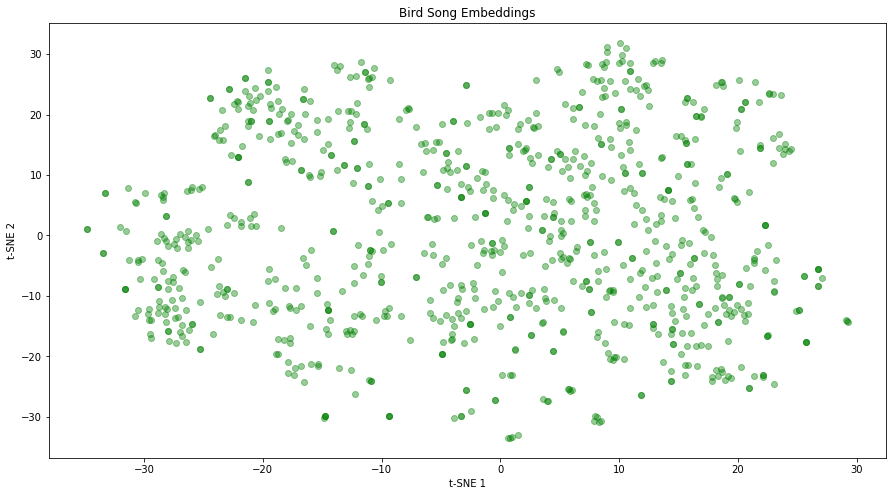

In [20]:
f = plt.figure(figsize=(15,8))
plt.title('Bird Song Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.scatter(tsne_comps[:, 0], tsne_comps[:, 1], alpha=0.4, c='g')

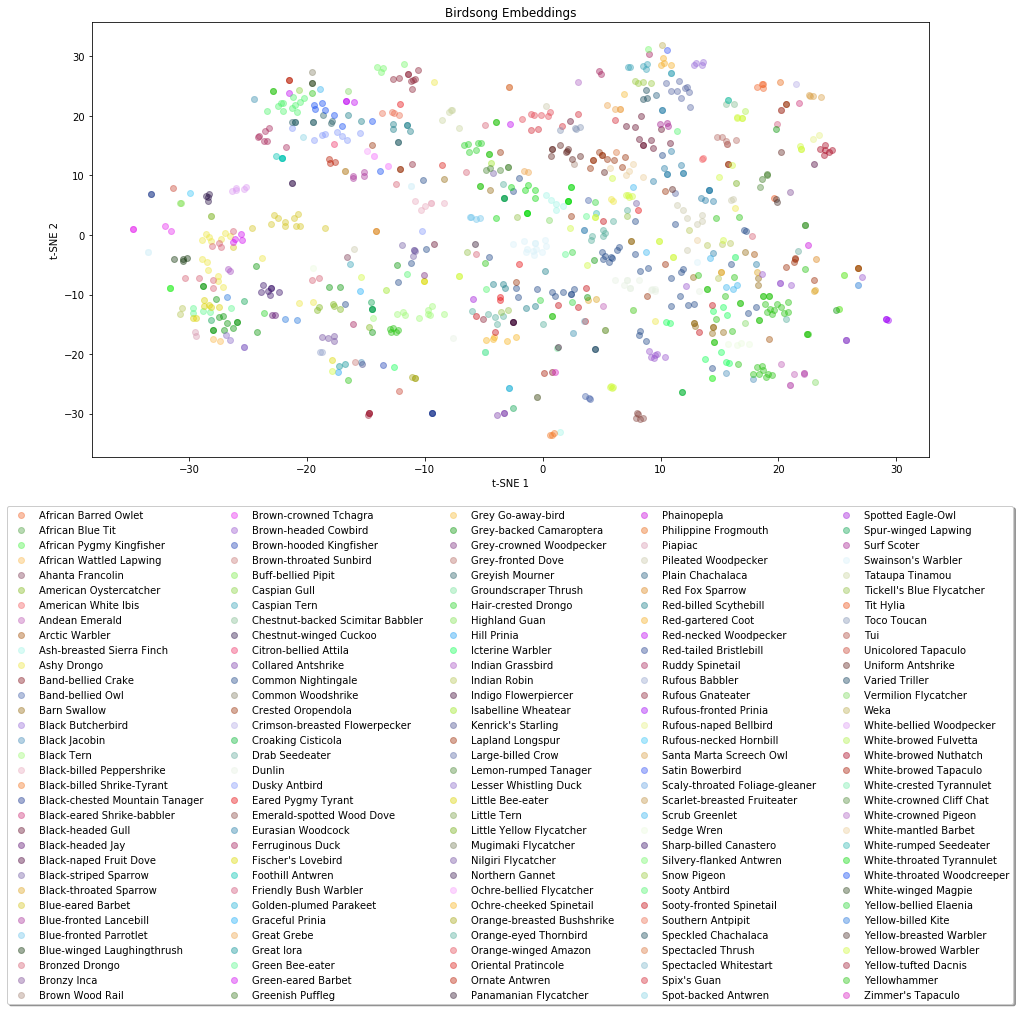

In [21]:
f = plt.figure(figsize=(15,8))
plt.title('Birdsong Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
for species in species_id_dict:
    if len(species_id_dict[species]) > 0:
        bird_type = species_df.loc[species_df['species_id'] == species, 'common_name'].values
        bird_type = bird_type[0]
        plt.scatter(
            tsne_comps[species_id_dict[species], 0], 
            tsne_comps[species_id_dict[species], 1], 
            alpha=0.4, 
            c=np.random.rand(1,3),
            label=bird_type
        )
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=5)
plt.show()